In [1]:
#add Matplotlib inline magic command
%matplotlib inline

#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"





In [3]:
#Read the city files
city_data_df = pd.read_csv(city_data_to_load)
# city_data_df.head(10)

In [4]:
#read the city files
ride_data_df = pd.read_csv(ride_data_to_load)
# ride_data_df.head(10)


# 5.2.4 Explore the data in Pandas

## Explore City Data

In [5]:
#Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#makesure there are no nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# how many data points for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the urban city
print(sum(city_data_df["type"] =="Urban"))
print(sum(city_data_df["type"] =="Rural"))
print(sum(city_data_df["type"] =="Suburban"))

66
18
36


## Explore the Ride Data

In [10]:
#count the non-null rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
#see if there are any null-values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge the Two Data Sets

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                         how='left', 
                         on=['city', 'city'])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# 5.3.1 pick up

In [21]:
#Create the urbn city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] =="Urban"]
# urban_cities_df.head()


In [22]:
#Creat suburban and rural cities dataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
# suburban_cities_df.head()

In [23]:
#Creat suburban and rural cities dataFrames
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]
# rural_cities_df.head()

# 5.3.2: get the number of rides for each city type

In [47]:
#5.3.2: get the number of rides for each city type
#Get the number of riders for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


# 5.3.3 get the average fare for each city type

In [48]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# 5.3.4 get the average number of drivers for each city type

In [49]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


# 5.3.5 Create bubble charts

In [68]:
# #build the scatter plot for urban cities
# # Build the scatter plots for urban cities.
# plt.scatter(urban_ride_count,
#       urban_avg_fare,
#       s=(urban_driver_count*10),
#       c='coral',
#       edgecolor='k', label='Urban',
#       alpha=0.8, linewidths=1)
# plt.title("Pyber Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (per City)")
# plt.grid(True)

# #add the legend
# plt.legend()

In [67]:
# # Build the scatter plots for suburban cities.
# plt.scatter(suburban_ride_count,
#       suburban_avg_fare,
#       s=10*suburban_driver_count, c="skyblue",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Suburban")
# plt.title("PyBer Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.grid(True)
# # Add the legend.
# plt.legend()

In [66]:
# # Build the scatter plots for rural cities.
# plt.scatter(rural_ride_count,
#       rural_avg_fare,
#       s=10*rural_driver_count, c="gold",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Rural")
# plt.title("PyBer Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.grid(True)
# # Add the legend.
# plt.legend()

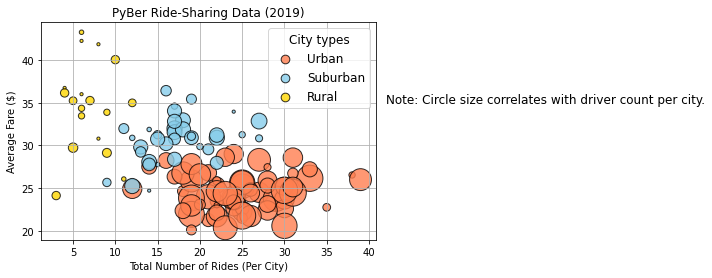

In [93]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize='12',mode="Expanded",
                 scatterpoints=1,loc='best', title="City types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("resources/Fig1.png")

# Show the plot
plt.show()